In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [4]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

alowbirthrate_all : 전체 데이터(수정 후 데이터0)

ALowBirthRate1 : 시점별 비교를 위해 전국만 추출한 데이터(수정 후 데이터 1)

ALowBirthRate2 : 행정구열별 비교를 위해 전국 데이터 삭제 후 년도별 평균낸 데이터(수정 후 데이터 2)

# 데이터 전처리

## 데이터 불러오기

In [5]:
alowbirthrate = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/신혼부부통계 데이터/시도별_신혼부부_총괄_20240110204133.csv', encoding='cp949')
alowbirthrate.head(3)

,행정구역별,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2016,...,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,신혼부부 수 (A),...,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,1436948,...,1.3,0.80,1032253,555743,53.8,437452,42.4,547929,1.3,0.79
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,278294,...,1.3,0.62,184084,112303,61.0,66419,36.1,85839,1.3,0.62


## 열이름 변경 및 특정 데이터 추출(통합)

In [6]:
# 열 이름 변경
alowbirthrate.columns = ['행정구역별', '신혼부부수_2015', '맞벌이부부수_2015', '맞벌이비율_2015', '주택소유신혼부부수_2015', '주택소유율_2015', '총소유주택수_2015', '주택소유부부평균소유주택_2015', '평균출생아수_2015',
                                       '신혼부부수_2016', '맞벌이부부수_2016', '맞벌이비율_2016', '주택소유신혼부부수_2016', '주택소유율_2016', '총소유주택수_2016', '주택소유부부평균소유주택_2016', '평균출생아수_2016',
                                       '신혼부부수_2017', '맞벌이부부수_2017', '맞벌이비율_2017', '주택소유신혼부부수_2017', '주택소유율_2017', '총소유주택수_2017', '주택소유부부평균소유주택_2017', '평균출생아수_2017',
                                       '신혼부부수_2018', '맞벌이부부수_2018', '맞벌이비율_2018', '주택소유신혼부부수_2018', '주택소유율_2018', '총소유주택수_2018', '주택소유부부평균소유주택_2018', '평균출생아수_2018',
                                       '신혼부부수_2019', '맞벌이부부수_2019', '맞벌이비율_2019', '주택소유신혼부부수_2019', '주택소유율_2019', '총소유주택수_2019', '주택소유부부평균소유주택_2019', '평균출생아수_2019',
                                       '신혼부부수_2020', '맞벌이부부수_2020', '맞벌이비율_2020', '주택소유신혼부부수_2020', '주택소유율_2020', '총소유주택수_2020', '주택소유부부평균소유주택_2020', '평균출생아수_2020',
                                       '신혼부부수_2021', '맞벌이부부수_2021', '맞벌이비율_2021', '주택소유신혼부부수_2021', '주택소유율_2021', '총소유주택수_2021', '주택소유부부평균소유주택_2021', '평균출생아수_2021',
                                       '신혼부부수_2022', '맞벌이부부수_2022', '맞벌이비율_2022', '주택소유신혼부부수_2022', '주택소유율_2022', '총소유주택수_2022', '주택소유부부평균소유주택_2022', '평균출생아수_2022']

re_alowbirthrate = alowbirthrate.drop([0], axis = 0)
re_alowbirthrate.head(3)

,행정구역별,신혼부부수_2015,맞벌이부부수_2015,맞벌이비율_2015,주택소유신혼부부수_2015,주택소유율_2015,총소유주택수_2015,주택소유부부평균소유주택_2015,평균출생아수_2015,신혼부부수_2016,...,주택소유부부평균소유주택_2021,평균출생아수_2021,신혼부부수_2022,맞벌이부부수_2022,맞벌이비율_2022,주택소유신혼부부수_2022,주택소유율_2022,총소유주택수_2022,주택소유부부평균소유주택_2022,평균출생아수_2022
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,1436948,...,1.3,0.80,1032253,555743,53.8,437452,42.4,547929,1.3,0.79
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,278294,...,1.3,0.62,184084,112303,61.0,66419,36.1,85839,1.3,0.62
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,88339,...,1.3,0.79,58215,30855,53.0,24147,41.5,31330,1.3,0.78


In [7]:
# 2015년 데이터만 추출
alowbirthrate_15 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2015' in col]]
alowbirthrate_15['시점'] = '2015'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2015': '신혼부부수', '맞벌이부부수_2015': '맞벌이부부수', '맞벌이비율_2015': '맞벌이비율', '주택소유신혼부부수_2015':'주택소유신혼부부', '주택소유율_2015':'주택소유율', '총소유주택수_2015':'총소유주택수', '주택소유부부평균소유주택_2015':'주택소유부부평균소유주택수',  '평균출생아수_2015':'평균출생아수'}

alowbirthrate_15 = alowbirthrate_15.rename(columns=new_columns)
alowbirthrate_15_drop = alowbirthrate_15.dropna(axis=0)
alowbirthrate_15_drop.head(3)

<ipython-input-7-65ec12ac905b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_15['시점'] = '2015'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015


In [8]:
# 2016년 데이터만 추출
alowbirthrate_16 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2016' in col]]
alowbirthrate_16['시점'] = '2016'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2016': '신혼부부수', '맞벌이부부수_2016': '맞벌이부부수', '맞벌이비율_2016': '맞벌이비율', '주택소유신혼부부수_2016':'주택소유신혼부부', '주택소유율_2016':'주택소유율', '총소유주택수_2016':'총소유주택수', '주택소유부부평균소유주택_2016':'주택소유부부평균소유주택수', '평균출생아수_2016':'평균출생아수'}

alowbirthrate_16 = alowbirthrate_16.rename(columns=new_columns)
alowbirthrate_16_drop = alowbirthrate_16.dropna(axis=0)
alowbirthrate_16_drop.head(3)

<ipython-input-8-bf52cdd1e9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_16['시점'] = '2016'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,2016
2,서울특별시,278294,137150,49.3,106549,38.3,149295,1.4,0.76,2016
3,부산광역시,88339,35769,40.5,43465,49.2,57266,1.3,0.92,2016


In [9]:
# 2017년 데이터만 추출
alowbirthrate_17 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2017' in col]]
alowbirthrate_17['시점'] = '2017'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2017': '신혼부부수', '맞벌이부부수_2017': '맞벌이부부수', '맞벌이비율_2017': '맞벌이비율', '주택소유신혼부부수_2017':'주택소유신혼부부', '주택소유율_2017':'주택소유율', '총소유주택수_2017':'총소유주택수', '주택소유부부평균소유주택_2017':'주택소유부부평균소유주택수', '평균출생아수_2017':'평균출생아수'}

alowbirthrate_17 = alowbirthrate_17.rename(columns=new_columns)
alowbirthrate_17_drop = alowbirthrate_17.dropna(axis=0)
alowbirthrate_17_drop.head(3)

<ipython-input-9-55b0cd9e96ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_17['시점'] = '2017'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,2017
2,서울특별시,263148,131338,49.9,103090,39.2,140223,1.4,0.74,2017
3,부산광역시,83545,33953,40.6,41235,49.4,55268,1.3,0.91,2017


In [10]:
# 2018년 데이터만 추출
alowbirthrate_18 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2018' in col]]
alowbirthrate_18['시점'] = '2018'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2018': '신혼부부수', '맞벌이부부수_2018': '맞벌이부부수', '맞벌이비율_2018': '맞벌이비율', '주택소유신혼부부수_2018':'주택소유신혼부부', '주택소유율_2018':'주택소유율', '총소유주택수_2018':'총소유주택수', '주택소유부부평균소유주택_2018':'주택소유부부평균소유주택수', '평균출생아수_2018':'평균출생아수'}

alowbirthrate_18 = alowbirthrate_18.rename(columns=new_columns)
alowbirthrate_18_drop = alowbirthrate_18.dropna(axis=0)
alowbirthrate_18_drop.head(3)

<ipython-input-10-efa3c2ff453a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_18['시점'] = '2018'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,2018
2,서울특별시,246867,129568,52.5,96928,39.3,129937,1.3,0.70,2018
3,부산광역시,77755,33632,43.3,37101,47.7,50000,1.4,0.88,2018


In [11]:
# 2019년 데이터만 추출
alowbirthrate_19 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2019' in col]]
alowbirthrate_19['시점'] = '2019'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2019': '신혼부부수', '맞벌이부부수_2019': '맞벌이부부수', '맞벌이비율_2019': '맞벌이비율', '주택소유신혼부부수_2019':'주택소유신혼부부', '주택소유율_2019':'주택소유율', '총소유주택수_2019':'총소유주택수', '주택소유부부평균소유주택_2019':'주택소유부부평균소유주택수', '평균출생아수_2019':'평균출생아수'}

alowbirthrate_19 = alowbirthrate_19.rename(columns=new_columns)
alowbirthrate_19_drop = alowbirthrate_19.dropna(axis=0)
alowbirthrate_19_drop.head(3)

<ipython-input-11-edf8292b79bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_19['시점'] = '2019'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,2019
2,서울특별시,232454,125266,53.9,86801,37.3,117005,1.4,0.67,2019
3,부산광역시,72403,32413,44.8,32495,44.9,43629,1.3,0.84,2019


In [12]:
# 2020년 데이터만 추출
alowbirthrate_20 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2020' in col]]
alowbirthrate_20['시점'] = '2020'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2020': '신혼부부수', '맞벌이부부수_2020': '맞벌이부부수', '맞벌이비율_2020': '맞벌이비율', '주택소유신혼부부수_2020':'주택소유신혼부부', '주택소유율_2020':'주택소유율', '총소유주택수_2020':'총소유주택수', '주택소유부부평균소유주택_2020':'주택소유부부평균소유주택수', '평균출생아수_2020':'평균출생아수'}

alowbirthrate_20 = alowbirthrate_20.rename(columns=new_columns)
alowbirthrate_20_drop = alowbirthrate_20.dropna(axis=0)
alowbirthrate_20_drop.head(3)

<ipython-input-12-88f1693983fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_20['시점'] = '2020'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,2020
2,서울특별시,219101,124450,56.8,80134,36.6,106151,1.3,0.63,2020
3,부산광역시,67632,32299,47.8,29180,43.1,39052,1.3,0.81,2020


In [13]:
# 2021년 데이터만 추출
alowbirthrate_21 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2021' in col]]
alowbirthrate_21['시점'] = '2021'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2021': '신혼부부수', '맞벌이부부수_2021': '맞벌이부부수', '맞벌이비율_2021': '맞벌이비율', '주택소유신혼부부수_2021':'주택소유신혼부부', '주택소유율_2021':'주택소유율', '총소유주택수_2021':'총소유주택수', '주택소유부부평균소유주택_2021':'주택소유부부평균소유주택수', '평균출생아수_2021':'평균출생아수'}

alowbirthrate_21 = alowbirthrate_21.rename(columns=new_columns)
alowbirthrate_21_drop = alowbirthrate_21.dropna(axis=0)
alowbirthrate_21_drop.head(3)

<ipython-input-13-a8d64e42cad3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_21['시점'] = '2021'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,2021
2,서울특별시,200477,118770,59.2,74588,37.2,96108,1.3,0.62,2021
3,부산광역시,62431,31683,50.7,26694,42.8,35210,1.3,0.79,2021


In [14]:
# 2022년 데이터만 추출
alowbirthrate_22 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2022' in col]]
alowbirthrate_22['시점'] = '2022'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2022': '신혼부부수', '맞벌이부부수_2022': '맞벌이부부수', '맞벌이비율_2022': '맞벌이비율', '주택소유신혼부부수_2022':'주택소유신혼부부', '주택소유율_2022':'주택소유율', '총소유주택수_2022':'총소유주택수', '주택소유부부평균소유주택_2022':'주택소유부부평균소유주택수', '평균출생아수_2022':'평균출생아수'}

alowbirthrate_22 = alowbirthrate_22.rename(columns=new_columns)
alowbirthrate_22_drop = alowbirthrate_22.dropna(axis=0)
alowbirthrate_22_drop.head(3)

<ipython-input-14-c2cd1aabfeb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_22['시점'] = '2022'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1032253,555743,53.8,437452,42.4,547929,1.3,0.79,2022
2,서울특별시,184084,112303,61.0,66419,36.1,85839,1.3,0.62,2022
3,부산광역시,58215,30855,53.0,24147,41.5,31330,1.3,0.78,2022


In [15]:
# 데이터 통합
alowbirthrate_all = pd.concat([alowbirthrate_15, alowbirthrate_16, alowbirthrate_17, alowbirthrate_18, alowbirthrate_19, alowbirthrate_20, alowbirthrate_21, alowbirthrate_22])
alowbirthrate_all

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015
4,대구광역시,62811,23646,37.6,29353,46.7,35966,1.2,0.96,2015
5,인천광역시,89747,34291,38.2,40783,45.4,52464,1.3,0.95,2015
...,...,...,...,...,...,...,...,...,...,...
14,전라북도,29072,14940,51.4,13695,47.1,17491,1.3,0.95,2022
15,전라남도,31640,15334,48.5,16786,53.1,21538,1.3,1.01,2022
16,경상북도,45032,21090,46.8,22973,51.0,28762,1.3,0.90,2022
17,경상남도,59601,29293,49.1,30662,51.4,38232,1.2,0.88,2022


### 데이터 타입 확인 및 변경

In [16]:
alowbirthrate_all_info = alowbirthrate_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   행정구역           144 non-null    object
 1   신혼부부수          144 non-null    object
 2   맞벌이부부수         144 non-null    object
 3   맞벌이비율          144 non-null    object
 4   주택소유신혼부부       144 non-null    object
 5   주택소유율          144 non-null    object
 6   총소유주택수         144 non-null    object
 7   주택소유부부평균소유주택수  144 non-null    object
 8   평균출생아수         144 non-null    object
 9   시점             144 non-null    object
dtypes: object(10)
memory usage: 16.4+ KB


In [17]:
# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in alowbirthrate_all.columns if col != '행정구역']

# 문자열을 숫자로 변환
alowbirthrate_all[columns_to_process] = alowbirthrate_all[columns_to_process].apply(pd.to_numeric)
alowbirthrate_all.head(3)

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015


In [18]:
alowbirthrate_all_info = alowbirthrate_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역           144 non-null    object 
 1   신혼부부수          144 non-null    int64  
 2   맞벌이부부수         144 non-null    int64  
 3   맞벌이비율          144 non-null    float64
 4   주택소유신혼부부       144 non-null    int64  
 5   주택소유율          144 non-null    float64
 6   총소유주택수         144 non-null    int64  
 7   주택소유부부평균소유주택수  144 non-null    float64
 8   평균출생아수         144 non-null    float64
 9   시점             144 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 16.4+ KB


## 결측값확인

In [19]:
missing = alowbirthrate_all.isnull()
print(missing.any().any())

False


-> 데이터 내에 None값이 없음을 확인했음

## 테이터 전국별 행정구역별 나누기

In [20]:
nationwide_marriage = alowbirthrate_all[alowbirthrate_all['행정구역'] == '전국']
nationwide_marriage

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
1,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,2016
1,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,2017
1,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,2018
1,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,2019
1,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,2020
1,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,2021
1,전국,1032253,555743,53.8,437452,42.4,547929,1.3,0.79,2022


In [21]:
area_marriage = alowbirthrate_all[alowbirthrate_all.행정구역 != '전국']
area_marriage

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015
4,대구광역시,62811,23646,37.6,29353,46.7,35966,1.2,0.96,2015
5,인천광역시,89747,34291,38.2,40783,45.4,52464,1.3,0.95,2015
6,광주광역시,40707,17000,41.8,21081,51.8,25836,1.2,1.03,2015
...,...,...,...,...,...,...,...,...,...,...
14,전라북도,29072,14940,51.4,13695,47.1,17491,1.3,0.95,2022
15,전라남도,31640,15334,48.5,16786,53.1,21538,1.3,1.01,2022
16,경상북도,45032,21090,46.8,22973,51.0,28762,1.3,0.90,2022
17,경상남도,59601,29293,49.1,30662,51.4,38232,1.2,0.88,2022


# 현황분석

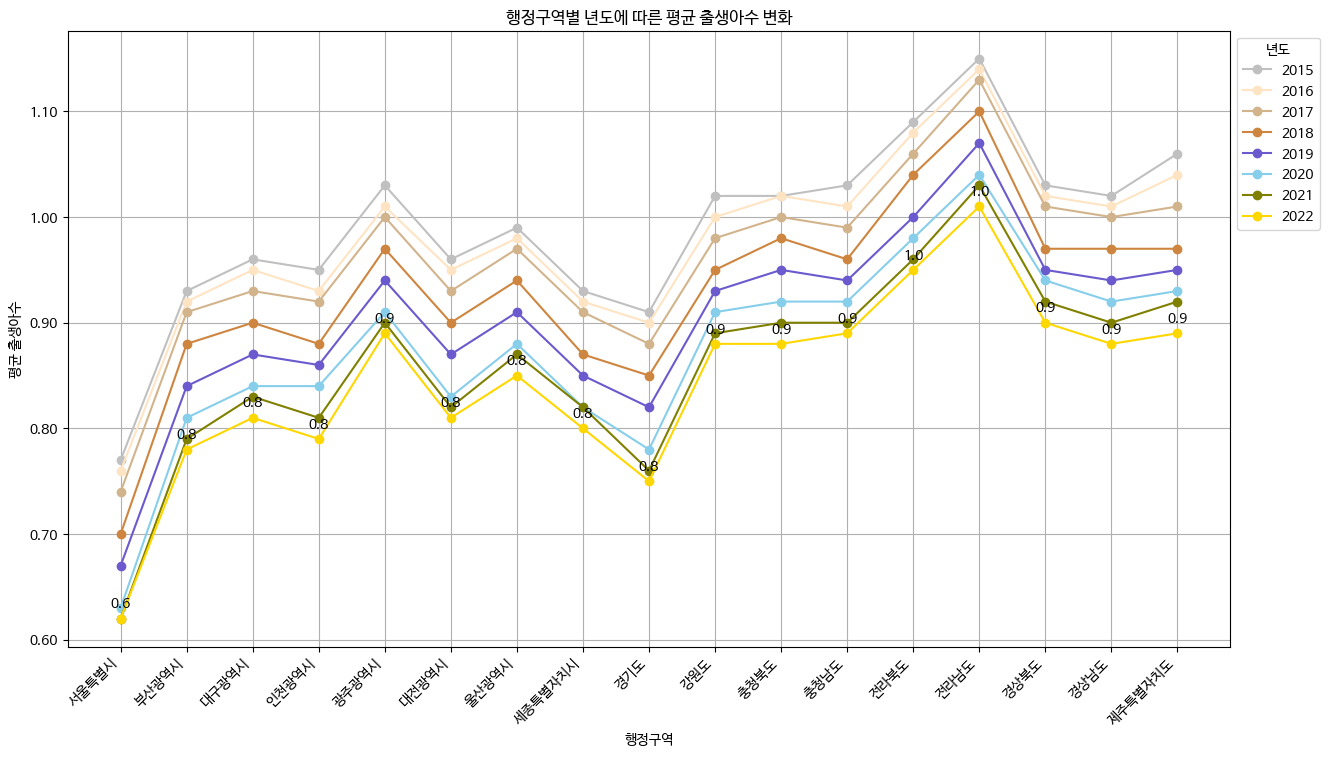

In [22]:
# 필터링된 데이터
filtered_data = area_marriage[(area_marriage['시점'] >= 2015) & (area_marriage['시점'] <= 2022)]

# 행정구역 및 색상 설정
regions = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
colors = ['silver', 'bisque', 'tan', 'peru', 'slateblue', 'skyblue', 'olive', 'gold']
markers = [ 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

# 그래프 그리기
plt.figure(figsize=(15, 8))
for i, year in enumerate(filtered_data['시점'].unique()):
    year_data = filtered_data[filtered_data['시점'] == year]
    plt.plot(year_data['행정구역'], year_data['평균출생아수'].round(2), label=str(year), color=colors[i], marker=markers[i])

    # 2022년도에만 숫자 표기
    if year == 2022:
        for j, txt in enumerate(year_data['평균출생아수'].round(1)):
            plt.annotate(txt, (year_data['행정구역'].iloc[j], year_data['평균출생아수'].iloc[j].round(2)),
                         textcoords="offset points", xytext=(0, 8), ha='center')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))

# 그래프 스타일 및 레이블 설정
plt.title('행정구역별 년도에 따른 평균 출생아수 변화')
plt.xlabel('행정구역')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 출생아수')
plt.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

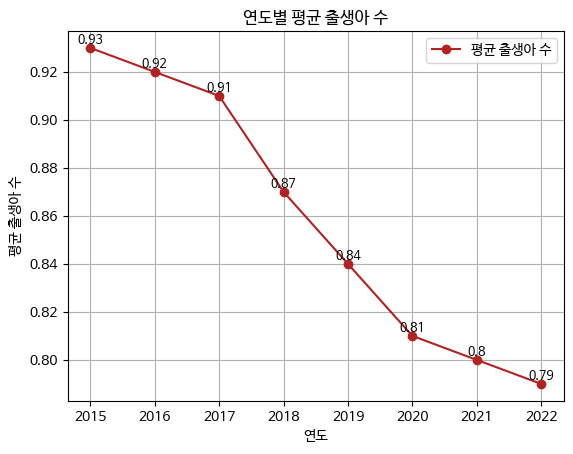

In [23]:
# 신생아 수 변화 분석(전국)

bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', color = 'firebrick', label='평균 출생아 수')

plt.title('연도별 평균 출생아 수')
plt.xlabel('연도')
plt.ylabel('평균 출생아 수')

for x, y1 in zip(nationwide_marriage['시점'], nationwide_marriage['평균출생아수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

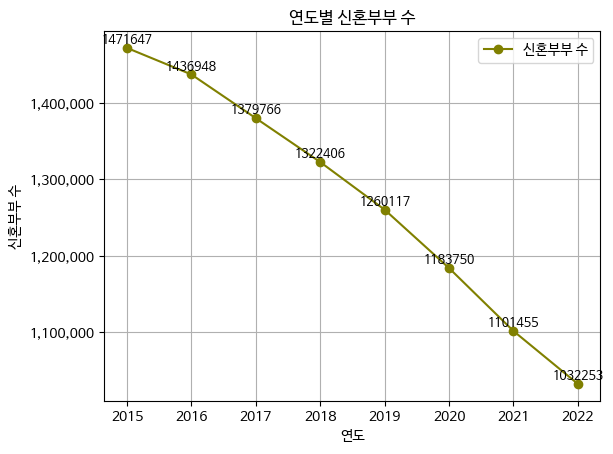

In [24]:
# 신혼부부 수 추이 분석

bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], marker='o', color = 'olive', label='신혼부부 수')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('연도별 신혼부부 수')
plt.xlabel('연도')
plt.ylabel('신혼부부 수')

for x, y1 in zip(nationwide_marriage['시점'], nationwide_marriage['신혼부부수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

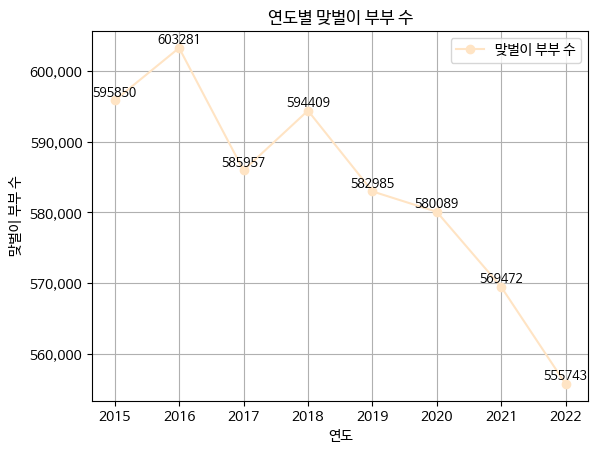

In [25]:
# 맞벌이 부부 수 추이 분석

bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['맞벌이부부수'], marker='o',color = 'bisque', label='맞벌이 부부 수')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('연도별 맞벌이 부부 수')
plt.xlabel('연도')
plt.ylabel('맞벌이 부부 수')

for x, y1 in zip(nationwide_marriage['시점'], nationwide_marriage['맞벌이부부수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

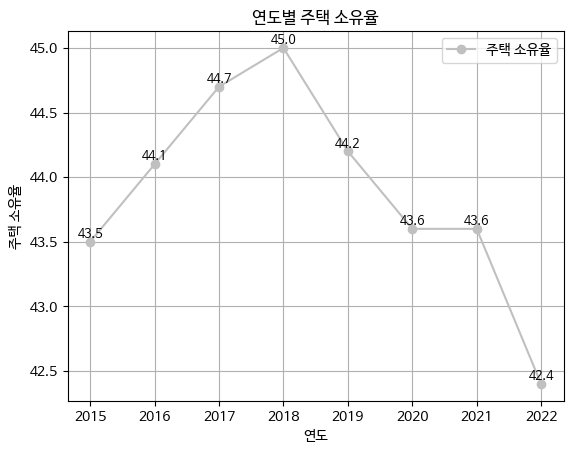

In [26]:
# 주택 소유율 추이 분석

bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['주택소유율'], marker='o', color = 'silver', label='주택 소유율')

plt.title('연도별 주택 소유율')
plt.xlabel('연도')
plt.ylabel('주택 소유율')

for x, y1 in zip(nationwide_marriage['시점'], nationwide_marriage['주택소유율']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

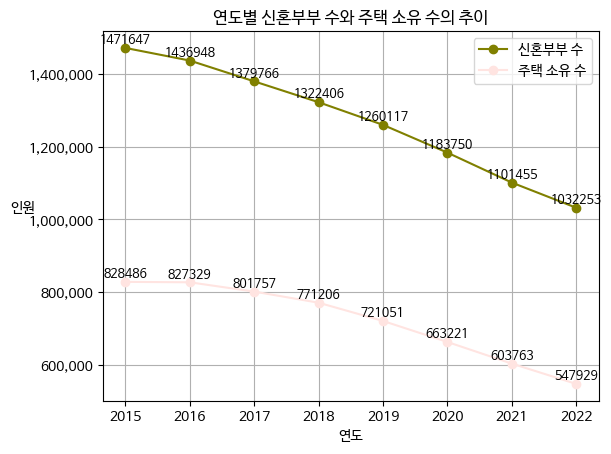

In [27]:
bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], marker='o', color = 'olive', label='신혼부부 수')
bar_y2 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['총소유주택수'], marker='o', color = 'mistyrose', label='주택 소유 수')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('연도별 신혼부부 수와 주택 소유 수의 추이')
plt.xlabel('연도')
plt.ylabel('인원', rotation=0)

for x, y1, y2 in zip(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], nationwide_marriage['총소유주택수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(x, y2, round(y2, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

# 시점별(연도별)

### 1) 신혼부부 수와 주택 소유 수의 추이(변화분석)

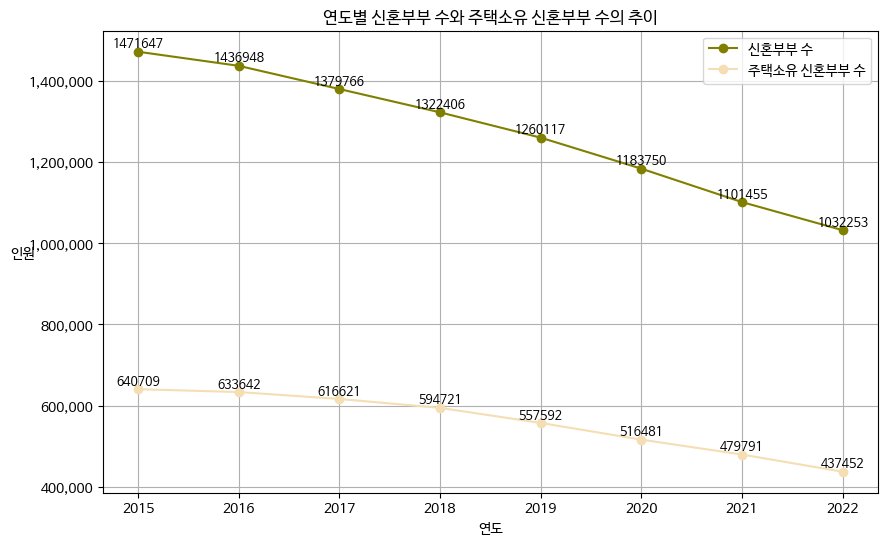

In [28]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))

bar_y1 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], marker='o', color = 'olive', label='신혼부부 수')
bar_y2 = plt.plot(nationwide_marriage['시점'], nationwide_marriage['주택소유신혼부부'], marker='o', color = 'wheat', label='주택소유 신혼부부 수')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('연도별 신혼부부 수와 주택소유 신혼부부 수의 추이')
plt.xlabel('연도')
plt.ylabel('인원', rotation=0)

for x, y1, y2 in zip(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], nationwide_marriage['주택소유신혼부부']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(x, y2, round(y2, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.legend()
plt.grid(True)
plt.show()

## 2) 연도별 맞벌이와 주택 소유 관련 분석(사회적 변화 추적)

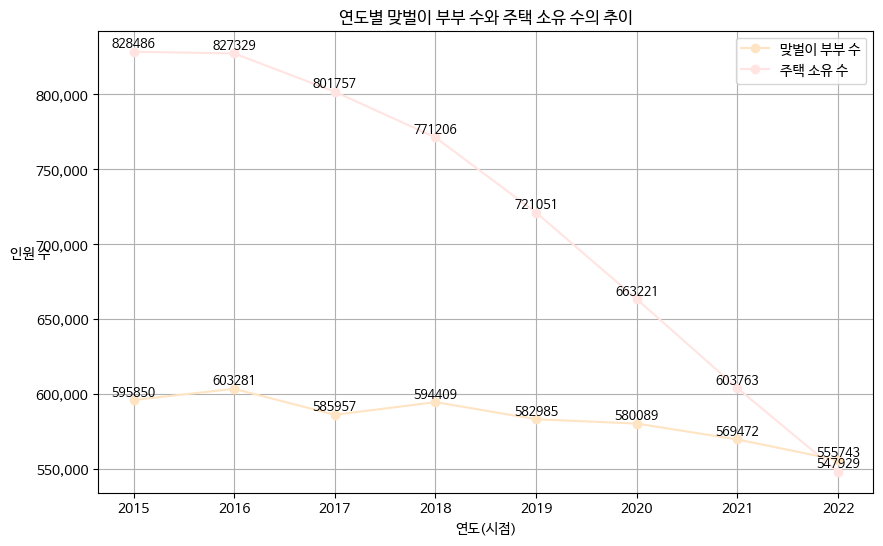

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(nationwide_marriage['시점'], nationwide_marriage['맞벌이부부수'], marker='o', color='bisque', label='맞벌이 부부 수')
plt.plot(nationwide_marriage['시점'], nationwide_marriage['총소유주택수'], marker='o', color='mistyrose', label='주택 소유 수')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

for x, y1, y2 in zip(nationwide_marriage['시점'], nationwide_marriage['맞벌이부부수'], nationwide_marriage['총소유주택수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(x, y2, round(y2, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.title('연도별 맞벌이 부부 수와 주택 소유 수의 추이')
plt.xlabel('연도(시점)')
plt.ylabel('인원 수', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

## 3) 맞벌이 부부 수와 출생아 수의 관련성 분석(상관분석 : 주택 소유가 출산에 미치는 영향)

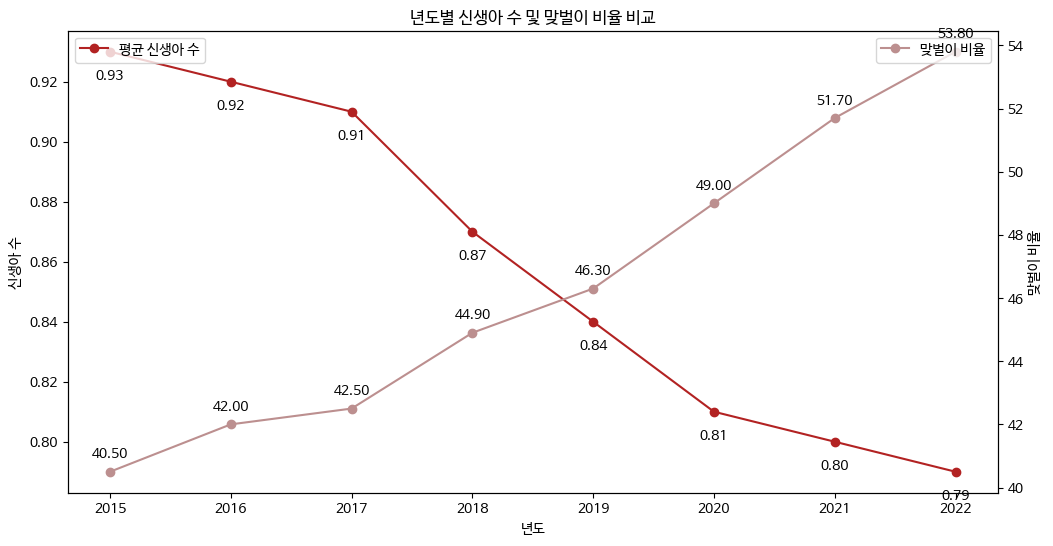

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 신생아 수', color='firebrick')
ax1.set_xlabel('년도')
ax1.set_ylabel('신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(nationwide_marriage['시점'], nationwide_marriage['맞벌이비율'], marker='o', label='맞벌이 비율', color='rosybrown')
ax2.set_ylabel('맞벌이 비율', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

for i, txt in enumerate(nationwide_marriage['평균출생아수']):
    ax1.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['평균출생아수'].iloc[i]), textcoords="offset points", xytext=(0, -20), ha='center')
for i, txt in enumerate(nationwide_marriage['맞벌이비율']):
    ax2.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['맞벌이비율'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('년도별 신생아 수 및 맞벌이 비율 비교')
plt.show()

In [31]:
correlation = nationwide_marriage['맞벌이비율'].corr(nationwide_marriage['평균출생아수'])

print(f"맞벌이 비율과  평균 출생아 수 간의 상관 계수: {correlation}")

맞벌이 비율과  평균 출생아 수 간의 상관 계수: -0.9724665524489993


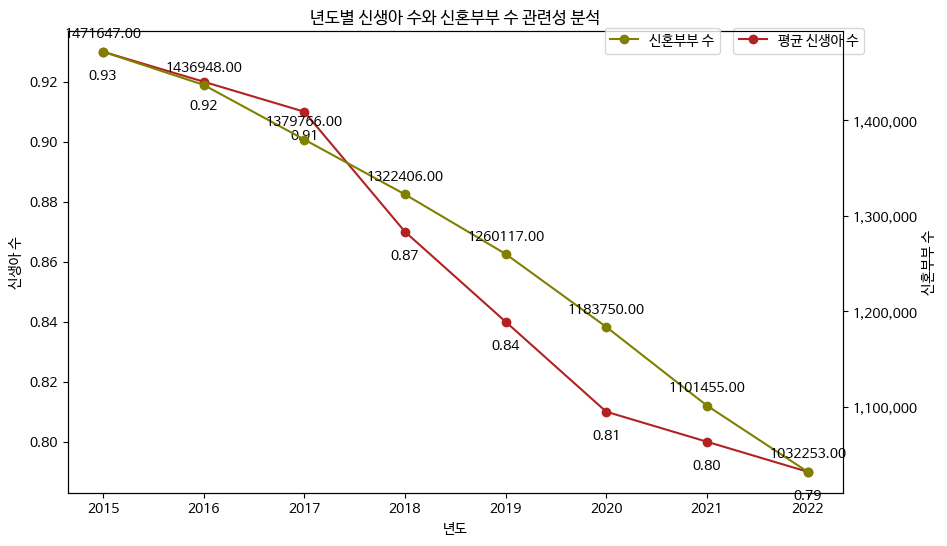

In [32]:
# 신혼부부 수와 평균 출생아 수 상관분석
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 신생아 수', color='firebrick')
ax1.set_xlabel('년도')
ax1.set_ylabel('신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', bbox_to_anchor=(0.85, 1.02))

ax2 = ax1.twinx()
ax2.plot(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], marker='o', label='신혼부부 수', color='olive')
ax2.set_ylabel('신혼부부 수', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right', bbox_to_anchor=(0.85, 1.02))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

for i, txt in enumerate(nationwide_marriage['평균출생아수']):
    ax1.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['평균출생아수'].iloc[i]), textcoords="offset points", xytext=(0, -20), ha='center')
for i, txt in enumerate(nationwide_marriage['신혼부부수']):
    ax2.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['신혼부부수'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('년도별 신생아 수와 신혼부부 수 관련성 분석')
plt.show()

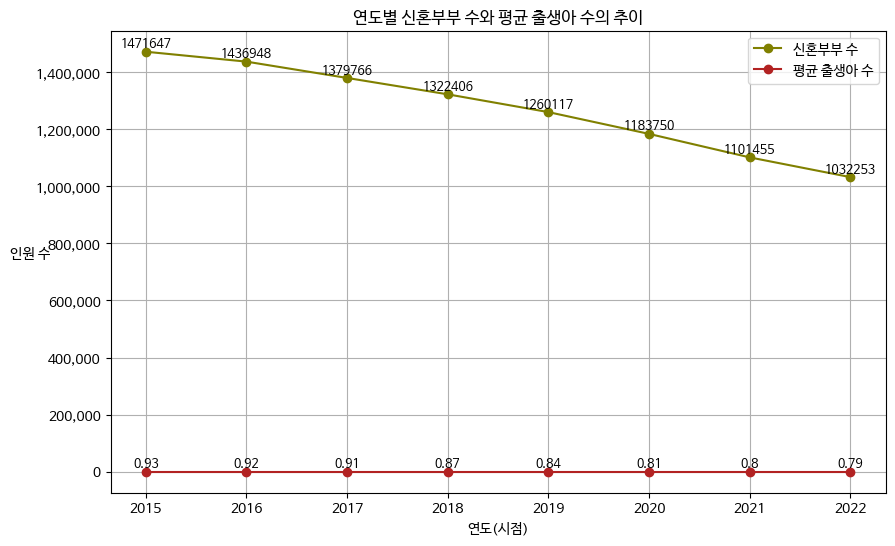

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], marker='o', label='신혼부부 수', color='olive')
plt.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 출생아 수', color='firebrick')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

for x, y1, y2 in zip(nationwide_marriage['시점'], nationwide_marriage['신혼부부수'], nationwide_marriage['평균출생아수']):
    plt.text(x, y1, round(y1, 2), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(x, y2, round(y2, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.title('연도별 신혼부부 수와 평균 출생아 수의 추이')
plt.xlabel('연도(시점)')
plt.ylabel('인원 수', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

In [34]:
correlation = nationwide_marriage['신혼부부수'].corr(nationwide_marriage['평균출생아수'])
print(f"신혼부부 수와  평균 출생아 수 간의 상관 계수: {correlation}")

신혼부부 수와  평균 출생아 수 간의 상관 계수: 0.97754421860978


## 4) 평균 출생아 수와 주택 소유율 관련성 분석(주택 소유율이 출산에 미치는 영향)

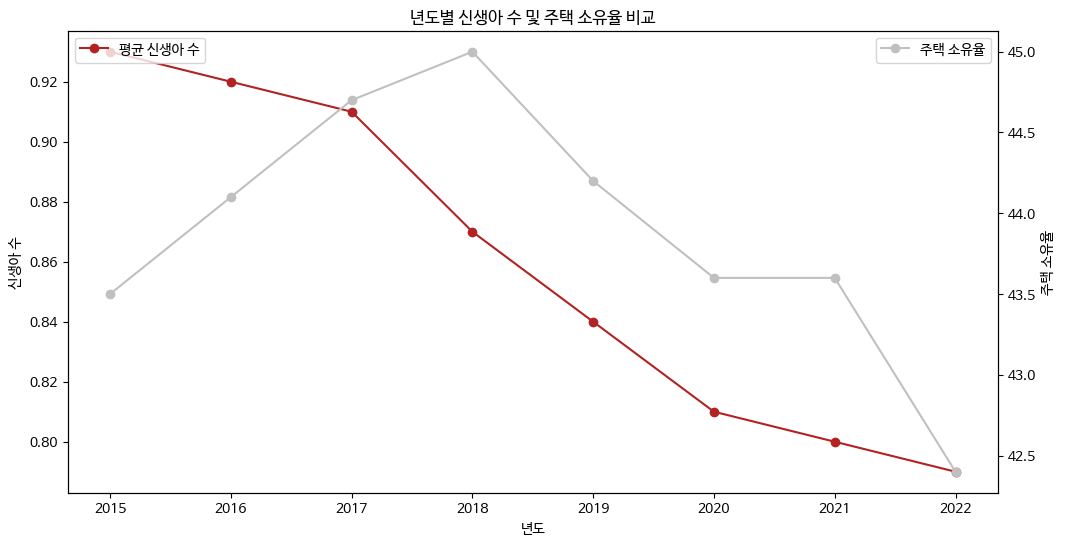

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 신생아 수', color='firebrick')
ax1.set_xlabel('년도')
ax1.set_ylabel('신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(nationwide_marriage['시점'], nationwide_marriage['주택소유율'], marker='o', label='주택 소유율', color='silver')
ax2.set_ylabel('주택 소유율', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title('년도별 신생아 수 및 주택 소유율 비교')
plt.show()

In [36]:
correlation = nationwide_marriage['주택소유율'].corr(nationwide_marriage['평균출생아수'])
print(f"주택 소유율과  평균 출생아 수 간의 상관 계수: {correlation}")

주택 소유율과  평균 출생아 수 간의 상관 계수: 0.5206213732494248


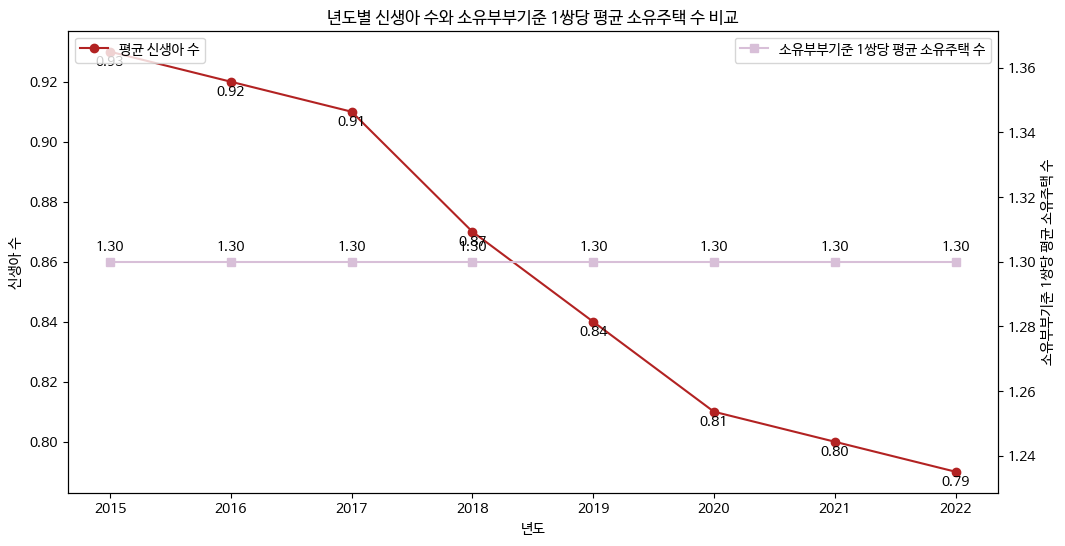

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 신생아 수', color='firebrick')
ax1.set_xlabel('년도')
ax1.set_ylabel('신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(nationwide_marriage['시점'], nationwide_marriage['주택소유부부평균소유주택수'], marker='s', label='소유부부기준 1쌍당 평균 소유주택 수', color='thistle')
ax2.set_ylabel('소유부부기준 1쌍당 평균 소유주택 수', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

for i, txt in enumerate(nationwide_marriage['평균출생아수']):
    ax1.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['평균출생아수'].iloc[i]), textcoords="offset points", xytext=(0, -10), ha='center')
for i, txt in enumerate(nationwide_marriage['주택소유부부평균소유주택수']):
    ax2.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['주택소유부부평균소유주택수'].iloc[i]), textcoords="offset points", xytext=(0, 8), ha='center')

plt.title('년도별 신생아 수와 소유부부기준 1쌍당 평균 소유주택 수 비교')
plt.show()

In [38]:
correlation = nationwide_marriage['주택소유부부평균소유주택수'].corr(nationwide_marriage['평균출생아수'])
print(f"소유부부기준 1쌍당 평균 소유주택 수와  평균 출생아 수 간의 상관 계수: {correlation}")

소유부부기준 1쌍당 평균 소유주택 수와  평균 출생아 수 간의 상관 계수: nan


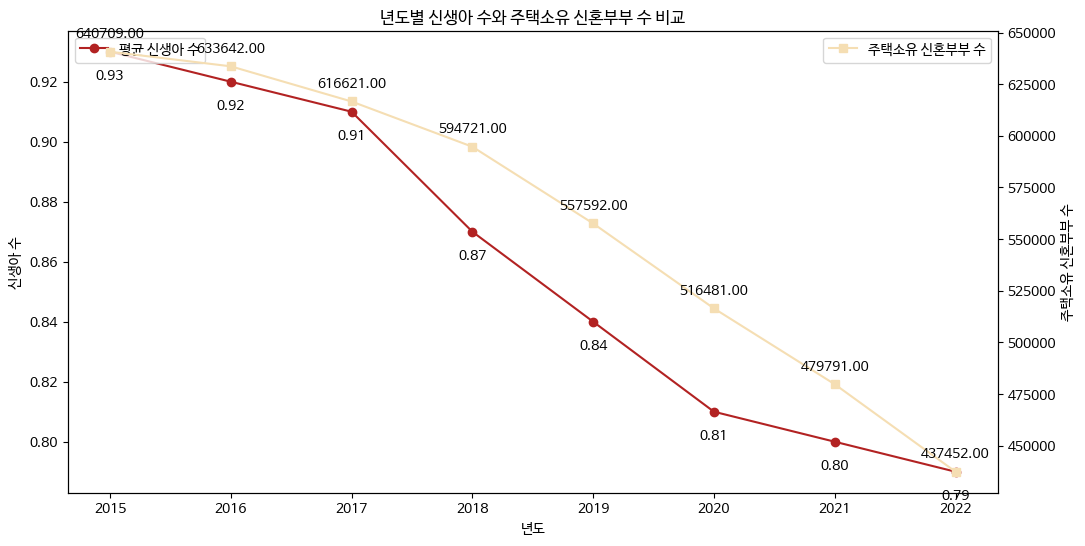

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(nationwide_marriage['시점'], nationwide_marriage['평균출생아수'], marker='o', label='평균 신생아 수', color='firebrick')
ax1.set_xlabel('년도')
ax1.set_ylabel('신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(nationwide_marriage['시점'], nationwide_marriage['주택소유신혼부부'], marker='s', label='주택소유 신혼부부 수', color='wheat')
ax2.set_ylabel('주택소유 신혼부부 수', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

for i, txt in enumerate(nationwide_marriage['평균출생아수']):
    ax1.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['평균출생아수'].iloc[i]), textcoords="offset points", xytext=(0, -20), ha='center')
for i, txt in enumerate(nationwide_marriage['주택소유신혼부부']):
    ax2.annotate(f'{txt:.2f}', (nationwide_marriage['시점'].iloc[i], nationwide_marriage['주택소유신혼부부'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('년도별 신생아 수와 주택소유 신혼부부 수 비교')
plt.show()